In [2]:
import csv
import math
import numpy as np
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt

In [3]:
data_hdf0 = pd.read_hdf('.../tourmaline/hdf/gx_dat_He_He_Bulge_metallicity_0.017.h5')
data_hdf1 = pd.read_hdf('.../tourmaline/hdf/gx_dat_He_He_ThickDisk_metallicity_0.00255.h5')
data_hdf2 = pd.read_hdf('.../tourmaline/hdf/gx_dat_He_He_ThinDisk_metallicity_0.017.h5')
data_hdf3 = pd.read_hdf('.../tourmaline/hdf/gx_dat_CO_CO_Bulge_metallicity_0.017.h5')
data_hdf4 = pd.read_hdf('.../tourmaline/hdf/gx_dat_CO_CO_ThickDisk_metallicity_0.00255.h5')
data_hdf5 = pd.read_hdf('.../tourmaline/hdf/gx_dat_CO_CO_ThinDisk_metallicity_0.017.h5')
data_hdf6 = pd.read_hdf('.../tourmaline/hdf/gx_dat_ONe_He_ONe_Bulge_metallicity_0.017.h5')
data_hdf7 = pd.read_hdf('.../tourmaline/hdf/gx_dat_ONe_He_ONe_ThickDisk_metallicity_0.00255.h5')
data_hdf8 = pd.read_hdf('.../tourmaline/hdf/gx_dat_ONe_He_ONe_ThinDisk_metallicity_0.017.h5')

data = pd.concat([data_hdf0, data_hdf1, data_hdf2, data_hdf3,
                     data_hdf4, data_hdf5, data_hdf6, data_hdf7, data_hdf8], axis=0)

data

,bin_num,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,...,sep_final,ecc_final,porb_final,RL_1_final,RL_2_final,f_gw_peak,xGx,yGx,zGx,dist
13,633252,9030.215929,0.458955,0.237332,10.0,10.0,0.744374,0.089200,0.0,0.045775,...,0.739954,0.0,0.088359,0.323366,0.239382,0.000262,0.542329,-1.620798,-0.448930,7.659305
46,27840,9199.369129,0.419236,0.236743,10.0,10.0,0.678785,0.080025,0.0,0.053507,...,0.637509,0.0,0.072798,0.273604,0.210813,0.000318,-2.079518,-1.621555,-0.493324,10.232635
13,51970,8744.165197,0.445089,0.253748,10.0,10.0,0.948678,0.128104,0.0,0.037228,...,0.691156,0.0,0.079618,0.296043,0.229093,0.000291,-0.073927,-0.037485,0.246913,8.074150
18,634240,8982.288796,0.455583,0.201196,10.0,10.0,0.363804,0.031381,0.0,0.091090,...,0.217809,0.0,0.014529,0.098245,0.067707,0.001593,0.094335,-0.040787,0.339978,7.907010
51,238004,9695.447709,0.464920,0.257873,10.0,10.0,1.129962,0.163742,0.0,0.030386,...,1.126922,0.0,0.162993,0.485447,0.370999,0.000142,0.093886,0.444071,-0.029206,7.921892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,589152,3048.299031,1.184261,0.310538,12.0,10.0,3.106605,0.519051,0.0,0.003365,...,3.030357,0.0,0.499787,1.506756,0.821457,0.000046,2.073642,2.012458,0.148488,6.258942
58,26207,1310.495109,1.189959,0.542346,12.0,11.0,3.290501,0.525597,0.0,0.003468,...,3.226612,0.0,0.510086,1.446338,1.011092,0.000045,0.897061,0.009462,0.266593,7.103257
25,782596,1398.356370,1.261608,0.539174,12.0,11.0,4.406538,0.798892,0.0,0.001989,...,4.275198,0.0,0.763026,1.940863,1.317855,0.000030,0.723746,-0.037318,0.069071,7.277528
41,763261,180.005520,1.212271,0.747813,12.0,11.0,3.277424,0.491172,0.0,0.003464,...,2.776053,0.0,0.382684,1.169636,0.938190,0.000060,-1.863780,-0.452263,0.150125,9.874269


In [8]:
# fixed population for reference - need to select out kstar = 10, 11, 12 (WD)

'''
#bulge
data_fixed0 = pd.read_hdf('.../tourmaline/fixed/bulge/dat_kstar1_10_kstar2_10_SFstart_13700.0_SFduration_0.0_metallicity_0.017.h5', key='bpp')
data_fixed1 = pd.read_hdf('.../tourmaline/fixed/bulge/dat_kstar1_12_kstar2_10_12_SFstart_13700.0_SFduration_0.0_metallicity_0.017.h5', key='bpp')
data_fixed2 = pd.read_hdf('.../tourmaline/fixed/bulge/dat_kstar1_11_kstar2_10_SFstart_13700.0_SFduration_0.0_metallicity_0.017.h5', key='bpp')
data_fixed3 = pd.read_hdf('.../tourmaline/fixed/bulge/dat_kstar1_11_kstar2_11_SFstart_13700.0_SFduration_0.0_metallicity_0.017.h5', key='bpp')

#thickdisk
data_fixed4 = pd.read_hdf('.../tourmaline/fixed/thickdisk/dat_kstar1_10_kstar2_10_SFstart_13700.0_SFduration_0.0_metallicity_0.00255.h5', key='bpp')
data_fixed5 = pd.read_hdf('.../tourmaline/fixed/thickdisk/dat_kstar1_12_kstar2_10_12_SFstart_13700.0_SFduration_0.0_metallicity_0.00255.h5', key='bpp')
data_fixed6 = pd.read_hdf('.../tourmaline/fixed/thickdisk/dat_kstar1_11_kstar2_10_SFstart_13700.0_SFduration_0.0_metallicity_0.00255.h5', key='bpp')
data_fixed7 = pd.read_hdf('.../tourmaline/fixed/thickdisk/dat_kstar1_11_kstar2_11_SFstart_13700.0_SFduration_0.0_metallicity_0.00255.h5', key='bpp')


#thindisk
data_fixed8 = pd.read_hdf('.../tourmaline/fixed/thindisk/dat_kstar1_10_kstar2_10_SFstart_13700.0_SFduration_0.0_metallicity_0.017.h5', key='bpp')
data_fixed9 = pd.read_hdf('.../tourmaline/fixed/thindisk/dat_kstar1_12_kstar2_10_12_SFstart_13700.0_SFduration_0.0_metallicity_0.017.h5', key='bpp')
data_fixed10 = pd.read_hdf('.../tourmaline/fixed/thindisk/dat_kstar1_11_kstar2_10_SFstart_13700.0_SFduration_0.0_metallicity_0.017.h5', key='bpp')
data_fixed11 = pd.read_hdf('.../tourmaline/fixed/thindisk/dat_kstar1_11_kstar2_11_SFstart_13700.0_SFduration_0.0_metallicity_0.017.h5', key='bpp')


data_fixed = pd.concat([data_fixed0, data_fixed1, data_fixed2, data_fixed3,
                       data_fixed4, data_fixed5, data_fixed6, data_fixed7,
                       data_fixed8, data_fixed9, data_fixed10, data_fixed11], axis=0)

data_fixed


select0 = np.where(data_fixed['evol_type'] == 2)[0]
data_fixed0 = data_fixed.iloc[select0]

data_fixed0

select1 = np.where((data_fixed0['kstar_1']==10) & (data_fixed0['kstar_2']==10))[0]
select2 = np.where((data_fixed0['kstar_1']==10) & (data_fixed0['kstar_2']==11))[0]
select3 = np.where((data_fixed0['kstar_1']==10) & (data_fixed0['kstar_2']==12))[0]
select4 = np.where((data_fixed0['kstar_1']==11) & (data_fixed0['kstar_2']==10))[0]
select5 = np.where((data_fixed0['kstar_1']==11) & (data_fixed0['kstar_2']==11))[0]
select6 = np.where((data_fixed0['kstar_1']==11) & (data_fixed0['kstar_2']==12))[0]
select7 = np.where((data_fixed0['kstar_1']==12) & (data_fixed0['kstar_2']==10))[0]
select8 = np.where((data_fixed0['kstar_1']==12) & (data_fixed0['kstar_2']==11))[0]
select9 = np.where((data_fixed0['kstar_1']==12) & (data_fixed0['kstar_2']==12))[0]


select_all = np.concatenate((select1, select2, select3, select4, select5, select6, select7, select8, select9),
                            axis=None)

data = data_fixed0.iloc[select_all]
'''

In [5]:
# read data
m1_rd = data["mass_1"] # [solar mass]
m2_rd = data["mass_2"] # m1 > m2
ecc_final_rd = data["ecc"]
sep_final_rd = data["sep"] # semi-major axis [solar radius]
porb_final_rd = data["porb"]
omega_spin1_rd = data["omega_spin_1"]/(365) # change unit from [rad/yr] to [day^-1]
omega_spin2_rd = data["omega_spin_2"]/(365) # change unit from [rad/yr] to [day^-1]
kstar_1_rd = data["kstar_1"]
kstar_2_rd = data["kstar_2"]

In [6]:
# choose ecc == 0 & m1 > m2 (q<1)
# choose kstar_1 & kstar_2 = 10, 11, 12 (WD & WD)
position = np.where( (ecc_final_rd==0) & ((m2_rd/m1_rd)<1.) )[0]

m1 = m1_rd.iloc[position]
m2 = m2_rd.iloc[position]
sep_final = sep_final_rd.iloc[position]
ecc_final = ecc_final_rd.iloc[position]
porb_final = porb_final_rd.iloc[position]
omega_spin2 = omega_spin2_rd.iloc[position]

In [7]:
dataposition = data.iloc[position]

In [8]:
G = 2938.372 # gravitational const in [(RSun^3)*(day^-2)*(MSun^-1)]
c = 37257.4385511 # speed of light in [RSun/day]

# roche lobe
m_b = m1 + m2 # binary mass
mu_b = (m1*m2)/m_b # reduced mass
q = m2/m1 # primary star; WD # secondary star; CP
e_b = ecc_final
a_b = sep_final # a_b = a1+a2 = sep for circuilar orbits
Omega_orb = np.sqrt(G*m_b/pow(a_b, 3)) # orbital frequency
# sep_ave = a_b*(1-e_b) # average sep of orbits
R_L = sep_final * 0.49*(q**(2/3)) / 0.6*(q**(2/3))+ np.log(1+q**(1/3)) # roche lobe radius
omega_RL = Omega_orb * np.sqrt(q/(1+q)) * (0.465*q + pow(np.log(1+pow(q, 1/3)), 3/2)) / (0.343*q*pow(1-e_b, 3/2))
ratio =  np.sqrt(q/(1+q)) * (0.465*q + pow(np.log(1+pow(q, 1/3)), 3/2)) / (0.343*q*pow(1-e_b, 3/2)) # fundamental Roche-lobe frequency

Msun = 1
delta_m1 = 0.001 * Msun * (m1/Msun)
delta_omega_RL = 0.5 * pow(10, -6) * pow(10*q, -1) * (delta_m1 * 1000 / Msun) * (m1/Msun) * (Omega_orb/(0.6*0.001))
resonance_width = pow(10, -3)

# e_b not zero
e_b_ecc = random.rand(len(ecc_final))
ratio_ecc_1 = np.sqrt(q/(1+q)) * (0.465*q + pow(np.log(1+pow(q, 1/3)), 3/2)) / (0.343*q*pow(1-e_b_ecc, 3/2))
ratio_ecc_01 = np.sqrt(q/(1+q)) * (0.465*q + pow(np.log(1+pow(q, 1/3)), 3/2)) / (0.343*q*pow(1-0.1*e_b_ecc, 3/2))

# continuous
q_con = np.linspace(0.05, 2, 500)
ratio_con_0 =  np.sqrt(q_con/(1+q_con)) * (0.465*q_con + pow(np.log(1+pow(q_con, 1/3)), 3/2)) / (0.343*q_con*pow(1, 3/2))# fundamental Roche-lobe frequency
ratio_con_001 =  np.sqrt(q_con/(1+q_con)) * (0.465*q_con + pow(np.log(1+pow(q_con, 1/3)), 3/2)) / (0.343*q_con*pow(1-0.01, 3/2))# fundamental Roche-lobe frequency
ratio_con_002 =  np.sqrt(q_con/(1+q_con)) * (0.465*q_con + pow(np.log(1+pow(q_con, 1/3)), 3/2)) / (0.343*q_con*pow(1-0.02, 3/2))# fundamental Roche-lobe frequency

In [9]:
judgement1 = np.isclose(ratio, 7/3, atol=0.0001) # judgement of distance
judgement2 = np.isclose(ratio, 9/4, atol=0.0001)
judgement3 = np.isclose(ratio, 11/5, atol=0.0001)
p = np.where((judgement1 == True) | (judgement2 == True) | (judgement3 == True))[0]
q_res = q.iloc[p]
ratio_res = ratio.iloc[p]

<ipython-input-10-842f41c76227>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


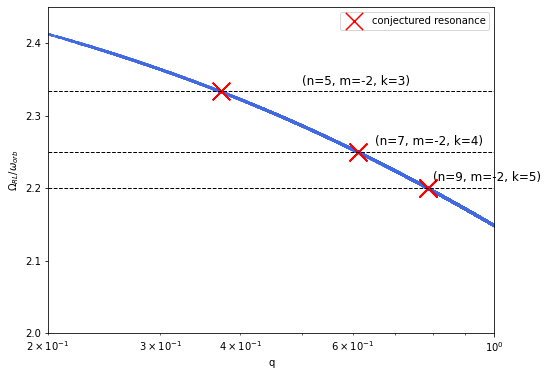

In [10]:
# use tourmaline data to roughly predict where the resonances are
# following Ford & McKernan 2017, figure 1

fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)
ax.set_xlim([0.2, 1])
ax.set_ylim([2.0, 2.45])
plt.xlabel("q")
plt.ylabel(r'$\Omega_{RL} / \omega_{orb}$')
plt.xscale("log")

plt.scatter(q, ratio, s=1, color='#4169E1', linewidth=1);
plt.scatter(q_res, ratio_res, marker = 'x', s = 300, color='r', label = "conjectured resonance");

# plt.axhline(y = 2.5, color = "k", ls = "--", linewidth = 1)
# plt.text(1, 2.51, '(n=3, m=-2, k=2)', fontsize=12, color='k')
plt.axhline(y = 7/3, color = "k", ls = "--", linewidth = 1)
plt.text(0.5, 7/3+0.01, '(n=5, m=-2, k=3)', fontsize=12, color='k')
plt.axhline(y = 9/4, color = "k", ls = "--", linewidth = 1)
plt.text(0.65, 9/4+0.01, '(n=7, m=-2, k=4)', fontsize=12, color='k')
plt.axhline(y = 11/5, color = "k", ls = "--", linewidth = 1)
plt.text(0.8, 11/5+0.01, '(n=9, m=-2, k=5)', fontsize=12, color='k')
plt.legend()
fig.show()


Resonance Judgment
==

$\frac{\omega_{*}}{k}-\frac{1}{\tau_{d}}<n\Omega_{orb}-m\omega_{spin}<\frac{\omega_{*}}{k}+\frac{1}{\tau_{d}}$
==

lower bound
==

$\Omega_{orb}>\frac{m}{n}\omega_{spin}+\frac{\omega_{*}}{nk}-\frac{1}{n\tau_{d}}$
==

upper bound
==

$\Omega_{orb}<\frac{m}{n}\omega_{spin}+\frac{\omega_{*}}{nk}+\frac{1}{n\tau_{d}}$
==

In [11]:
def judgement(m, n, k):
    # tau_d ranges from 10^(-7) to 10^(-5)
    # change number here to test different tau_d's
    # see testing over tau_d's in the next section
    one_over_tau_d = 86400 * pow(10, -5)
    R2 = sep_final * m1/(m1+m2)
    omega2 = np.sqrt(G*m2/pow(R2, 3)) # omega_star
    omega_spin = -omega_spin2
    omega_F = n*Omega_orb - m*omega_spin # forcing frequency
    lower_bound = omega2/k - one_over_tau_d    
    upper_bound = omega2/k + one_over_tau_d
    
    
    fig = plt.figure(figsize=(8,6))
    ax = plt.subplot(111)
    plt.xlabel("omega_spin")
    plt.ylabel('Omega_orb')
#     ax.set_xlim([-8000, -6000])
#     ax.set_ylim([-1, 60000])
    plt.scatter(omega_spin, (m*omega_spin+lower_bound)/n, s=50, color='r', label='lower_bound')
    plt.scatter(omega_spin, (m*omega_spin+upper_bound)/n, s=10, color='g', label='upper_bound')
    plt.scatter(omega_spin, Omega_orb, s=10, color='slateblue', label = 'omega_F')
    plt.legend()
    plt.show()
    
    
    # find resonance
    resonance = np.where((omega_F>=lower_bound)&(omega_F<=upper_bound))[0]
    print ("number of resonance:", len(resonance))
    before = np.where(omega_F<lower_bound)[0]
    print ("number of cases before resonance:", len(before))
    after = np.where(omega_F>upper_bound)[0]
    print ("number of cases after resonance:", len(after))
    
    bin_num_res = data['bin_num'].iloc[resonance]
    bin_num_before = data['bin_num'].iloc[before]
    bin_num_after = data['bin_num'].iloc[after]

    return resonance, before, after, bin_num_res, bin_num_before, bin_num_after



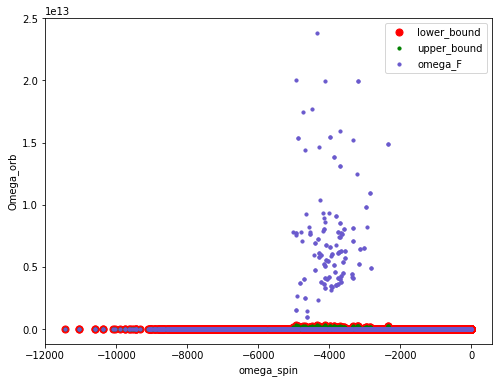

number of resonance: 6151
number of cases before resonance: 11366
number of cases after resonance: 7986
CPU times: user 396 ms, sys: 6.54 ms, total: 403 ms
Wall time: 403 ms


In [12]:
%%time
resonance1, before1, after1, bin_num_res, bin_num_before, bin_num_after = judgement(m=-2, n=9, k=5)

In [120]:
# bin_num_res, bin_num_before, bin_num_after

df_num_res = pd.DataFrame(list(bin_num_res), columns = ['bin_num'])
df_num_before = pd.DataFrame(list(bin_num_before), columns = ['bin_num'])
df_num_after = pd.DataFrame(list(bin_num_after), columns = ['bin_num'])

df_res_evol = pd.DataFrame(['current_resonance' for i in range(len(bin_num_res))], columns = ['current_state'])
df_before_evol = pd.DataFrame(['current_before' for i in range(len(bin_num_before))], columns = ['current_state'])
df_after_evol = pd.DataFrame(['current_after' for i in range(len(bin_num_after))], columns = ['current_state'])

df_res = pd.concat([df_num_res, df_res_evol], axis=1)
df_before = pd.concat([df_num_before, df_before_evol], axis=1)
df_after = pd.concat([df_num_after, df_after_evol], axis=1)

df_current = pd.concat([df_res, df_before, df_after], axis=0)


In [121]:
df_current

,bin_num,current_state
0,212805,current_resonance
1,57196,current_resonance
2,199588,current_resonance
3,97981,current_resonance
4,154929,current_resonance
...,...,...
10749027,670156,current_after
10749028,648196,current_after
10749029,580536,current_after
10749030,185839,current_after


In [99]:
# bin_num_res, bin_num_before, bin_num_after

df_num_res = pd.DataFrame(list(bin_num_res), columns = ['bin_num'])
df_num_before = pd.DataFrame(list(bin_num_before), columns = ['bin_num'])
df_num_after = pd.DataFrame(list(bin_num_after), columns = ['bin_num'])

df_res_evol = pd.DataFrame(['bpp_resonance' for i in range(len(bin_num_res))], columns = ['bpp_evol_state'])
df_before_evol = pd.DataFrame(['bpp_before' for i in range(len(bin_num_before))], columns = ['bpp_evol_state'])
df_after_evol = pd.DataFrame(['bpp_after' for i in range(len(bin_num_after))], columns = ['bpp_evol_state'])

df_res = pd.concat([df_num_res, df_res_evol], axis=1)
df_before = pd.concat([df_num_before, df_before_evol], axis=1)
df_after = pd.concat([df_num_after, df_after_evol], axis=1)

df_bpp_evol = pd.concat([df_res, df_before, df_after], axis=0)


In [100]:
df_bpp_evol

,bin_num,bpp_evol_state
0,409774,bpp_resonance
1,342233,bpp_resonance
2,342327,bpp_resonance
3,342579,bpp_resonance
4,343848,bpp_resonance
...,...,...
7981,86529,bpp_after
7982,86530,bpp_after
7983,86540,bpp_after
7984,86541,bpp_after


In [122]:
df = df_bpp_evol.merge(df_current, how='left', on='bin_num')

df

,bin_num,bpp_evol_state,current_state
0,409774,bpp_resonance,NaN
1,342233,bpp_resonance,NaN
2,342327,bpp_resonance,NaN
3,342579,bpp_resonance,NaN
4,343848,bpp_resonance,NaN
...,...,...,...
2092185,86529,bpp_after,NaN
2092186,86530,bpp_after,NaN
2092187,86540,bpp_after,NaN
2092188,86541,bpp_after,NaN


In [125]:
num1 = np.where((df['bpp_evol_state']=='bpp_resonance') & (df['current_state']=='current_after'))[0]
print (len(num1))


527821


In [126]:
df.iloc[num1]

,bin_num,bpp_evol_state,current_state
149,505421,bpp_resonance,current_after
150,505421,bpp_resonance,current_after
151,505421,bpp_resonance,current_after
152,505421,bpp_resonance,current_after
153,505421,bpp_resonance,current_after
...,...,...,...
544732,86559,bpp_resonance,current_after
544733,86559,bpp_resonance,current_after
544734,86559,bpp_resonance,current_after
544735,86559,bpp_resonance,current_after


In [127]:
num2 = np.where((df['bpp_evol_state']=='bpp_before') & (df['current_state']=='current_after'))[0]
print (len(num2))

895843


In [128]:
df.iloc[num2]

,bin_num,bpp_evol_state,current_state
544884,68957,bpp_before,current_after
544885,68957,bpp_before,current_after
544886,68957,bpp_before,current_after
544887,68957,bpp_before,current_after
544888,68957,bpp_before,current_after
...,...,...,...
1493467,85394,bpp_before,current_after
1493468,85394,bpp_before,current_after
1493469,85394,bpp_before,current_after
1493470,85394,bpp_before,current_after


testing tau_d
==

In [13]:
def judgement_t(m, n, k, t):
    one_over_tau_d = 86400 * pow(10, t) # 1/tau_d
    R2 = sep_final * m1/(m1+m2)
    omega2 = np.sqrt(G*m2/pow(R2, 3)) # omega_star
    omega_spin = -omega_spin2
    omega_F = n*Omega_orb - m*omega_spin # forcing frequency
    lower_bound = omega2/k - one_over_tau_d    
    upper_bound = omega2/k + one_over_tau_d
    
    # find resonance
    resonance = np.where((omega_F>=lower_bound)&(omega_F<=upper_bound))[0]
    
    return len(resonance)

In [14]:
# test over an array of t0
t0 = np.linspace(-7, -5, 1000)

# take one of the resonance judgements as an example
len_res = []
for i in t0:
    len_res.append(judgement_t(m=-2, n=9, k=5, t=i))

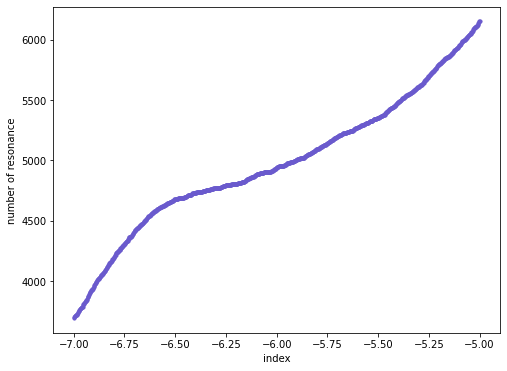

In [15]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)
plt.xlabel("index")
plt.ylabel('number of resonance')
plt.scatter(t0, len_res, s=10, color='slateblue')
plt.show()

In [17]:
dataposition_res = dataposition.iloc[resonance1]
print (len(dataposition_res))

6151


test over other resonances

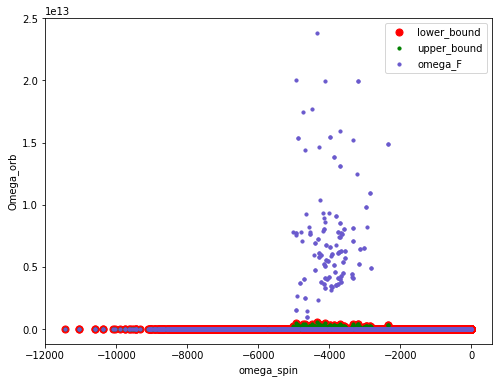

number of resonance: 6148
number of cases before resonance: 11703
number of cases after resonance: 7652


ValueError: too many values to unpack (expected 3)

In [18]:
resonance2, before2, after2 = judgement(m=-2, n=7, k=4)

In [20]:
len_res = []
for i in t0:
    len_res.append(judgement_t(m=-2, n=7, k=4, t=i))

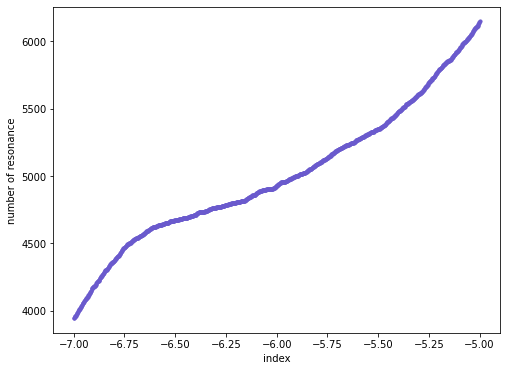

In [21]:
# plt.scatter(t0, len_res)

fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)
plt.xlabel("index")
plt.ylabel('number of resonance')
# ax.set_xlim([-8000, -6000])
# ax.set_ylim([-1, 60000])
plt.scatter(t0, len_res, s=10, color='slateblue')
# plt.legend()
plt.show()

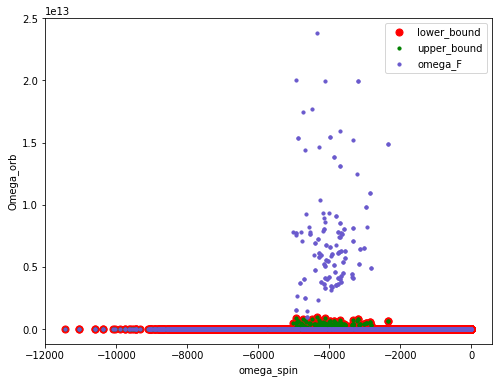

number of resonance: 6148
number of cases before resonance: 12040
number of cases after resonance: 7315


ValueError: too many values to unpack (expected 3)

In [19]:
resonance3, before3, after3 = judgement(m=-2, n=5, k=3)

In [23]:
len_res = []
for i in t0:
    len_res.append(judgement_t(m=-2, n=5, k=3, t=i))

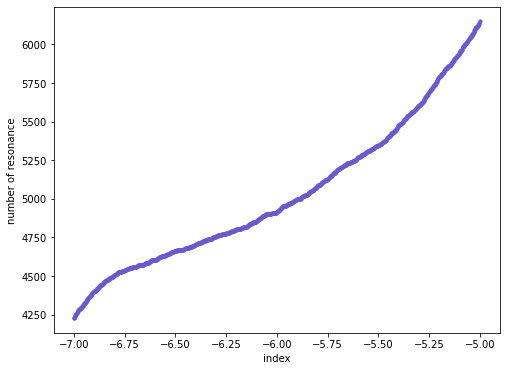

In [24]:
# plt.scatter(t0, len_res)

fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)
plt.xlabel("index")
plt.ylabel('number of resonance')
# ax.set_xlim([-8000, -6000])
# ax.set_ylim([-1, 60000])
plt.scatter(t0, len_res, s=10, color='slateblue')
# plt.legend()
plt.show()

resonance lasting time
==

In [ ]:
# Calculating the time

M_c = pow((m1*m2), 3/5) / pow((m1+m2), 1/5) # chirp mass

def time(m_c, f):
    t = -5/256 * pow(np.pi, -8/3) * pow(c*c*c/(G*m_c), 5/3) * pow(f, -8/3)
    return t

before1_max =  np.where(q[before1]==max(q[before1]))[0]
after1_min =  np.where(q[after1]==min(q[after1]))[0]

print (q[before1_max])
print (q[after1_min])

f_gw_res1 = 2*Omega_orb[resonance1] # GW frequency
f_gw_before1 = 2*Omega_orb[before1_max]
f_gw_after1 = 2*Omega_orb[after1_min]

t_res1 = time(m_c=M_c[resonance1], f=f_gw_res1)
t_before1 = time(m_c=M_c[before1_max], f=f_gw_before1)
t_after1 = time(m_c=M_c[after1_min], f=f_gw_after1)

interval = abs(t_after1.values-t_before1.values)

print (interval)

print ("resonance lasting time:",interval[0],"day")